In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('monthly-milk-production.csv', usecols=[1]).values

In [3]:
import numpy as np

In [4]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [5]:
dataset_x, dataset_y = create_dataset(df, 12)

In [6]:
train_x = dataset_x[0:155]
train_y = dataset_y[0:155]
test_x = dataset_x[-12:-11]
test_y = dataset_y[-12:]

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
train_set = scaler.fit_transform(train_x)

In [10]:
test_set = scaler.transform(test_x)

In [11]:
train_set = train_x.reshape(155,12,1)

In [12]:
test_set = test_x.reshape(1,12,1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [14]:
neurons = 100

In [15]:
model = Sequential()

model.add(GRU(neurons, activation='relu', input_shape=(12,1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
model.fit(x=train_set, y=train_y, epochs=100, batch_size=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 155 samples
Epoch 1/100
155/155 [==============================] - 1s 9ms/sample - loss: 169016.2974
Epoch 2/100
155/155 [==============================] - 1s 7ms/sample - loss: 1822.1224
Epoch 3/100
155/155 [==============================] - 1s 6ms/sample - loss: 1801.7577
Epoch 4/100
155/155 [==============================] - 1s 6ms/sample - loss: 1658.0965
Epoch 5/100
155/155 [==============================] - 1s 6ms/sample - loss: 1563.4173
Epoch 6/100
155/155 [==============================] - 1s 6ms/sample - loss: 1522.7818
Epoch 7/100
155/155 [==============================] - 1s 6ms/sample - loss: 1333.4337
Epoch 8/100
155/155 [==============================] - 1s 7ms/sample - loss: 1358.3611
Epoch 9/100
155/155 [==============================] - 1s 7ms/sample - loss: 1145.6239
Epoch 10/100
155/155 [==============================] - 1s 7ms/sample - loss: 1200.3290
Epoch 11/100

155/155 [==============================] - 1s 7ms/sample - loss: 310.8186
Epoch 91/100
155/155 [==============================] - 1s 7ms/sample - loss: 349.1224
Epoch 92/100
155/155 [==============================] - 1s 7ms/sample - loss: 464.5835
Epoch 93/100
155/155 [==============================] - 1s 7ms/sample - loss: 460.0079
Epoch 94/100
155/155 [==============================] - 1s 7ms/sample - loss: 413.1332
Epoch 95/100
155/155 [==============================] - 1s 7ms/sample - loss: 345.8722
Epoch 96/100
155/155 [==============================] - 1s 7ms/sample - loss: 375.8753
Epoch 97/100
155/155 [==============================] - 1s 7ms/sample - loss: 338.4975
Epoch 98/100
155/155 [==============================] - 1s 7ms/sample - loss: 334.0914
Epoch 99/100
155/155 [==============================] - 1s 7ms/sample - loss: 375.4658
Epoch 100/100
155/155 [==============================] - 1s 7ms/sample - loss: 392.5811


In [17]:
pred = []

In [18]:
input_set = test_set
for _ in range(12):
    tmp = model.predict(x=input_set)
    pred.append(tmp)
    tmp2 = input_set.tolist()
    tmp2[0].append(tmp)
    del tmp2[0][0]
    tmp2 = np.array(tmp2, dtype='object')
    input_set = tmp2

In [19]:
pred = np.array(pred, dtype='object').flatten()

In [20]:
pred

array([792.1012573242188, 812.0210571289062, 792.382568359375,
       877.2960205078125, 890.95458984375, 953.1889038085938,
       937.0464477539062, 898.4268798828125, 872.7803955078125,
       811.1898193359375, 808.651123046875, 773.6380615234375],
      dtype=object)

In [21]:
test_y

array([813., 834., 782., 892., 903., 966., 937., 896., 858., 817., 827.,
       797.])

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mse = mean_squared_error(test_y, pred)

In [24]:
import math

In [25]:
math.sqrt(mse)

14.982278014820011

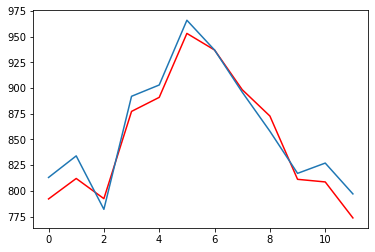

In [26]:
plt.plot(pred, 'r')
plt.plot(test_y)